In [1]:
# Import neophodnih biblioteka
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

# Definisanje putanja do CSV fajla i direktorijuma sa slikama
csv_path = 'Resources/sample_labels_cleaned.csv'
image_folder_path = 'Images'

# Učitavanje CSV fajla
data = pd.read_csv(csv_path)
print("CSV data loaded successfully!")

# Prikaz prvih nekoliko redova dataframe-a za proveru
print(data.head())


CSV data loaded successfully!
        Image Index                                     Finding Labels  \
0  00000013_005.png  ['Emphysema', 'Infiltration', 'Pleural_Thicken...   
1  00000013_026.png                      ['Cardiomegaly', 'Emphysema']   
2  00000017_001.png                                     ['No Finding']   
3  00000030_001.png                                    ['Atelectasis']   
4  00000032_001.png              ['Cardiomegaly', 'Edema', 'Effusion']   

   Follow-up #  Patient ID  Patient Age  Patient Gender  View Position  \
0          5.0        13.0         60.0               1              0   
1         26.0        13.0         57.0               1              0   
2          1.0        17.0         77.0               1              0   
3          1.0        30.0         79.0               1              1   
4          1.0        32.0         55.0               0              0   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  ...  \


In [2]:
# Zadržavanje relevantnih kolona
columns_to_keep = ['Image Index', 'Patient Age', 'Patient Gender', 'View Position',
                   'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
                   'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 
                   'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

data = data[columns_to_keep]

# Provera preostalih kolona
print(data.head())
print(data.info())




        Image Index  Patient Age  Patient Gender  View Position  Atelectasis  \
0  00000013_005.png         60.0               1              0          0.0   
1  00000013_026.png         57.0               1              0          0.0   
2  00000017_001.png         77.0               1              0          0.0   
3  00000030_001.png         79.0               1              1          1.0   
4  00000032_001.png         55.0               0              0          0.0   

   Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  Fibrosis  Hernia  \
0           0.0            0.0    0.0       0.0        1.0       0.0     0.0   
1           1.0            0.0    0.0       0.0        1.0       0.0     0.0   
2           0.0            0.0    0.0       0.0        0.0       0.0     0.0   
3           0.0            0.0    0.0       0.0        0.0       0.0     0.0   
4           1.0            0.0    1.0       1.0        0.0       0.0     0.0   

   Infiltration  Mass  No Finding  Nod

In [3]:
# Konverzija tipova podataka
data['Patient Age'] = data['Patient Age'].astype(np.float32)
data['Patient Gender'] = data['Patient Gender'].astype(np.int32)
data['View Position'] = data['View Position'].astype(np.int32)
for column in data.columns[4:]:
    data[column] = data[column].astype(np.float32)

# Provera tipova podataka nakon konverzije
print(data.dtypes)

Image Index            object
Patient Age           float32
Patient Gender          int32
View Position           int32
Atelectasis           float32
Cardiomegaly          float32
Consolidation         float32
Edema                 float32
Effusion              float32
Emphysema             float32
Fibrosis              float32
Hernia                float32
Infiltration          float32
Mass                  float32
No Finding            float32
Nodule                float32
Pleural_Thickening    float32
Pneumonia             float32
Pneumothorax          float32
dtype: object


In [4]:
# Podela podataka na trening i test set
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

# Funkcija za učitavanje i preprocesiranje slike
def load_and_preprocess_image(image_path):
    full_path = os.path.join(image_folder_path, image_path)
    image = load_img(full_path, target_size=(224, 224))  # Promena veličine slike na 224x224
    image = img_to_array(image)  # Pretvaranje slike u numpy niz
    image = image / 255.0  # Normalizacija vrednosti piksela od 0 do 1
    return image

# Primena funkcije na kolonu sa putanjama slika uz upotrebu tqdm za prikaz napretka
train_data['image_array'] = [load_and_preprocess_image(path) for path in tqdm(train_data['Image Index'], desc='Processing training images')]
test_data['image_array'] = [load_and_preprocess_image(path) for path in tqdm(test_data['Image Index'], desc='Processing testing images')]

# Uklanjanje kolone 'image_array' iz oznaka
train_labels = train_data.drop(columns=['image_array'])
test_labels = test_data.drop(columns=['image_array'])

# Pretvaranje oznaka iz DataFrame-a u numpy niz
y_train = train_labels.iloc[:, 4:].values  # Oznake počinju od 5. kolone pa nadalje
y_test = test_labels.iloc[:, 4:].values

# Pretvaranje lista slika u numpy nizove
X_train = np.stack(train_data['image_array'].values)
X_test = np.stack(test_data['image_array'].values)

# Provera oblika slika i oznaka
print("Train images shape:", X_train.shape)
print("Test images shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Provera tipova podataka nakon konverzije
print("y_train dtype:", y_train.dtype)
print("y_test dtype:", y_test.dtype)

# Konverzija oznaka u float32 ako je potrebno
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Provera tipova podataka nakon konverzije
print("y_train dtype after conversion:", y_train.dtype)
print("y_test dtype after conversion:", y_test.dtype)


Processing training images:   0%|          | 0/4483 [00:00<?, ?it/s]

Processing testing images:   0%|          | 0/1121 [00:00<?, ?it/s]

Train images shape: (4483, 224, 224, 3)
Test images shape: (1121, 224, 224, 3)
Train labels shape: (4483, 15)
Test labels shape: (1121, 15)
y_train dtype: float32
y_test dtype: float32
y_train dtype after conversion: float32
y_test dtype after conversion: float32


In [5]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras import regularizers

# Definisanje modela
model = models.Sequential([
    Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    layers.Dense(15, activation='sigmoid')  # Uskladite broj izlaznih jedinica sa brojem oznaka
])

# Kompilacija modela
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prikaz arhitekture modela
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,943 (42.47 MB)

 Trainable params: 11,132,943 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Treniranje modela
history = model.fit(
    X_train, y_train,
    epochs=10,  # Možeš prilagoditi broj epoha prema potrebi
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 54s 370ms/step - accuracy: 0.3491 - loss: 0.6511 - val_accuracy: 0.5424 - val_loss: 0.2284
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 50s 356ms/step - accuracy: 0.4944 - loss: 0.2700 - val_accuracy: 0.5424 - val_loss: 0.2269
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 55s 390ms/step - accuracy: 0.5422 - loss: 0.2493 - val_accuracy: 0.5424 - val_loss: 0.2293
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 370ms/step - accuracy: 0.5354 - loss: 0.2429 - val_accuracy: 0.5424 - val_loss: 0.2239
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.5393 - loss: 0.2409 - val_accuracy: 0.5424 - val_loss: 0.2266
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.5363 - loss: 0.2379 - val_accuracy: 0.5424 - val_loss: 0.2237
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 51s 363ms/step - accuracy: 0.5335 - loss: 0.2349 - val_accuracy: 0.5424 - val_loss: 0.2191
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 51s 362ms/step - accuracy: 0.5547 - loss: 0

In [7]:
# Evaluacija modela na test setu
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5500 - loss: 0.2140
Test loss: 0.21792703866958618
Test accuracy: 0.5423728823661804


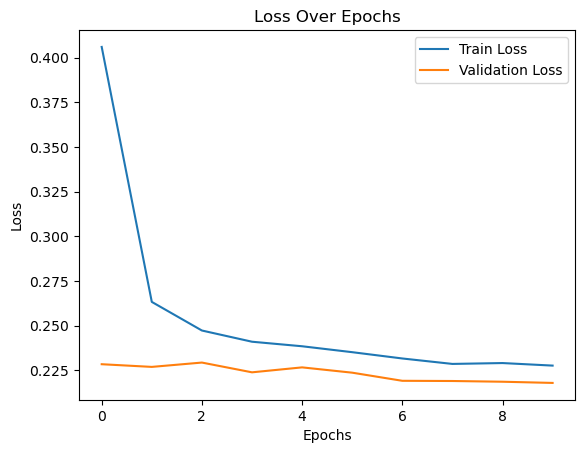

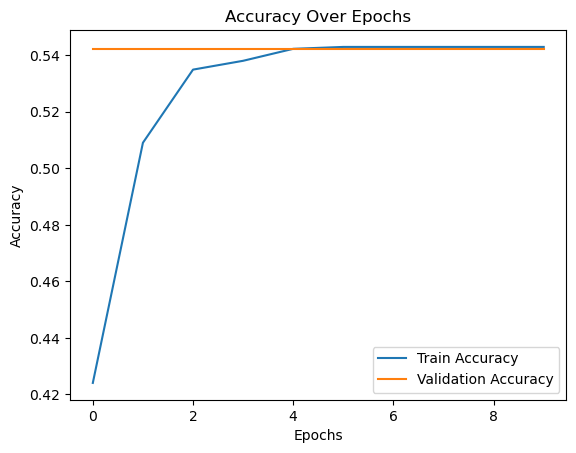

In [8]:
import matplotlib.pyplot as plt

# Plotovanje gubitka
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotovanje tačnosti
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras import regularizers

# Definisanje unapređenog modela
model = models.Sequential([
    Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    layers.Dense(15, activation='sigmoid')  # Uskladite broj izlaznih jedinica sa brojem oznaka
])

# Kompilacija modela
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prikaz arhitekture modela
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisanje augmentacije podataka
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Primena augmentacije na trening set
datagen.fit(X_train)

# Treniranje modela sa augmentacijom
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 71s 500ms/step - accuracy: 0.4587 - loss: 0.5352 - val_accuracy: 0.5424 - val_loss: 0.3046
Epoch 2/10
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1:03 458ms/step - accuracy: 0.6875 - loss: 0.2598

c:\Users\abeli\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6875 - loss: 0.2598 - val_accuracy: 0.5424 - val_loss: 0.3012
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 70s 492ms/step - accuracy: 0.5341 - loss: 0.2856 - val_accuracy: 0.5424 - val_loss: 0.2450
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5625 - loss: 0.2509 - val_accuracy: 0.5424 - val_loss: 0.2493
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 70s 493ms/step - accuracy: 0.5486 - loss: 0.2522 - val_accuracy: 0.5424 - val_loss: 0.2518
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5000 - loss: 0.2581 - val_accuracy: 0.5424 - val_loss: 0.2452
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 72s 502ms/step - accuracy: 0.5371 - loss: 0.2434 - val_accuracy: 0.5424 - val_loss: 0.2314
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6562 - loss: 0.1910 - val_accuracy: 0.5424 - val_loss: 0.2295
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 71s 495ms/step - accuracy: 0.5419 - loss: 0.2340 - val_accurac

In [12]:
# Evaluacija modela na test setu
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5500 - loss: 0.2243
Test loss: 0.22875235974788666
Test accuracy: 0.5423728823661804


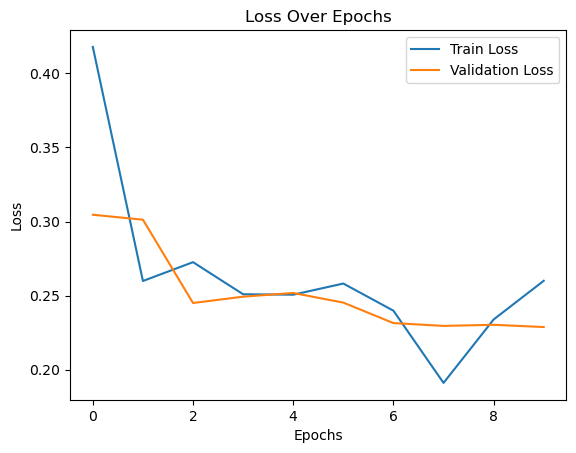

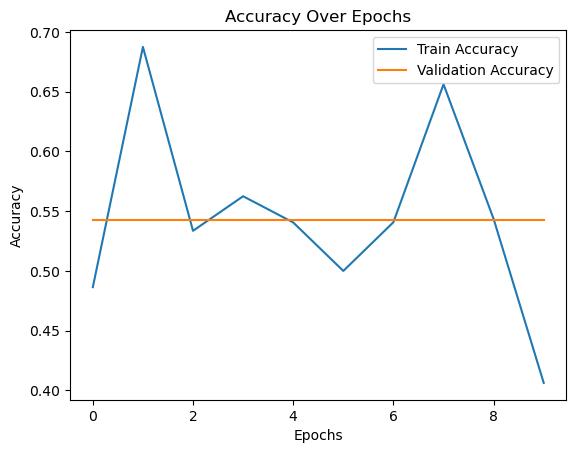

In [13]:
import matplotlib.pyplot as plt

# Plotovanje gubitka
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotovanje tačnosti
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Korišćenje pre-treniranog modela (npr. VGG16)

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Učitavanje pre-treniranog VGG16 modela bez top slojeva
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Zamrzavanje težina pre-treniranog modela
for layer in base_model.layers:
    layer.trainable = False

# Dodavanje novih slojeva
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(15, activation='sigmoid')(x)  # Uskladite broj izlaznih jedinica sa brojem oznaka

# Kreiranje novog modela
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilacija modela
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prikaz arhitekture modela
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,748,495 (56.26 MB)

 Trainable params: 33,807 (132.06 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# Treniranje modela
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.2127 - loss: 1.0135 - val_accuracy: 0.5424 - val_loss: 0.2417
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 72s 501ms/step - accuracy: 0.4062 - loss: 0.2503 - val_accuracy: 0.5424 - val_loss: 0.2413
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.4906 - loss: 0.2670 - val_accuracy: 0.5424 - val_loss: 0.2230
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 72s 505ms/step - accuracy: 0.6562 - loss: 0.2061 - val_accuracy: 0.5424 - val_loss: 0.2231
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.5319 - loss: 0.2393 - val_accuracy: 0.5424 - val_loss: 0.2187
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 73s 512ms/step - accuracy: 0.4375 - loss: 0.2145 - val_accuracy: 0.5424 - val_loss: 0.2188
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - accuracy: 0.5554 - loss: 0.2239 - val_accuracy: 0.5424 - val_loss: 0.2178
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 75s 521ms/step - accuracy: 0.5938 - loss: 0.2519 - 

In [16]:
# Evaluacija modela na test setu
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


36/36 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5500 - loss: 0.2128
Test loss: 0.21672557294368744
Test accuracy: 0.5423728823661804


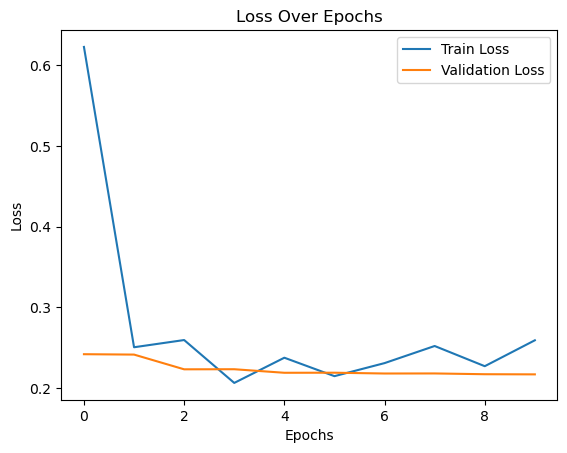

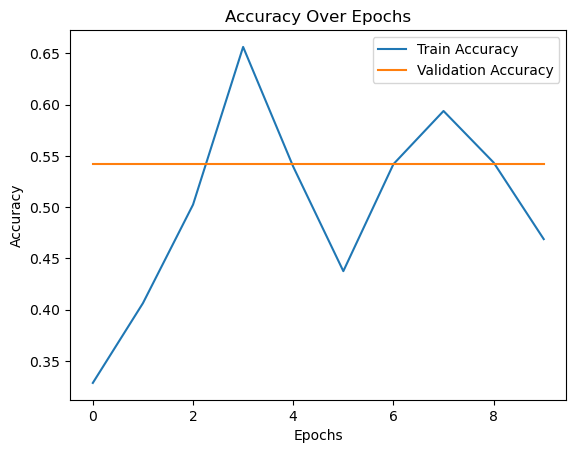

In [17]:
import matplotlib.pyplot as plt

# Plotovanje gubitka
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotovanje tačnosti
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Učitavanje pre-treniranog ResNet50 modela bez top slojeva
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Zamrzavanje težina pre-treniranog modela
for layer in base_model.layers:
    layer.trainable = False

# Dodavanje novih slojeva
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(15, activation='sigmoid')(x)  # Uskladite broj izlaznih jedinica sa brojem oznaka

# Kreiranje novog modela
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilacija modela
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prikaz arhitekture modela
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,851,919 (90.99 MB)

 Trainable params: 264,207 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
# Povećajmo broj epoha na 20
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    validation_data=(X_test, y_test)
)


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.3332 - loss: 1.1248 - val_accuracy: 0.5424 - val_loss: 0.2311
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.3750 - loss: 0.3092 - val_accuracy: 0.5424 - val_loss: 0.2309
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5402 - loss: 0.2403 - val_accuracy: 0.5424 - val_loss: 0.2228
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 204ms/step - accuracy: 0.4688 - loss: 0.2850 - val_accuracy: 0.5424 - val_loss: 0.2225
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5336 - loss: 0.2342 - val_accuracy: 0.5424 - val_loss: 0.2199
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - accuracy: 0.5312 - loss: 0.2704 - val_accuracy: 0.5424 - val_loss: 0.2202
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5463 - loss: 0.2320 - val_accuracy: 0.5424 - val_loss: 0.2184
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - accuracy: 0.7188 - loss: 0.1723 - 

In [20]:
# Evaluacija modela na test setu
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 780ms/step - accuracy: 0.5500 - loss: 0.2148
Test loss: 0.21922242641448975
Test accuracy: 0.5423728823661804


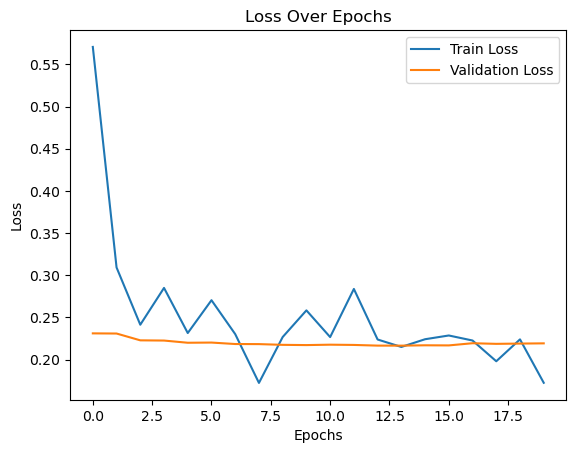

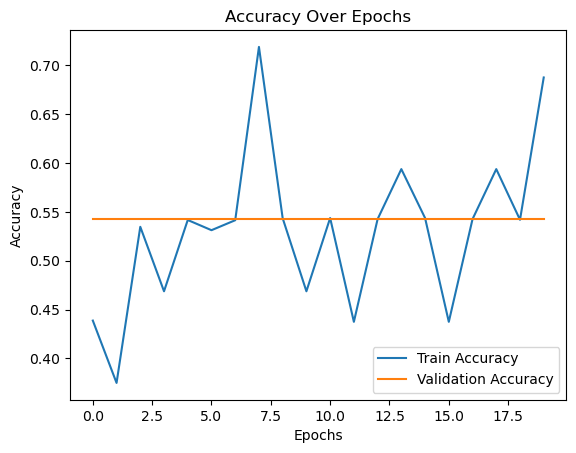

In [21]:
import matplotlib.pyplot as plt

# Plotovanje gubitka
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotovanje tačnosti
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
